In [75]:
# Descomentar para actualizar librerias
# Si se actualiza alguna libreria hay que reiniciar el notebook
#!pip install pandas --upgrade  --quiet
#!pip install numpy --upgrade  --quiet
#!pip install scipy --upgrade  --quiet
#!pip install statsmodels --upgrade  --quiet
#!pip install scikit-learn --upgrade  --quiet
#!pip install missingno --upgrade  --quiet
#!pip install apafib --upgrade --quiet
#!pip install -U numpy scipy scikit-learn pandas matplotlib seaborn statsmodels yellowbrick

In [76]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import Binarizer, MinMaxScaler, StandardScaler, PowerTransformer
from scipy import stats

import missingno as msno

import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)
from sklearn import set_config
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config

from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor.alphas import alphas
from statsmodels.genmod.generalized_linear_model import GLM
import statsmodels.api as sm
from scipy import stats

import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


from apafib import load_world_music

#a)
Divide el conjunto de datos en entrenamiento y test (70 %/30 %). Verás que todas las variables son continuas.

Hay algunos valores perdidos, impútalos usando el KNNImputer de
scikit-learn.

Una vez tenemos el conjunto de datos preprocesado puedes aplicar PCA
para ver su comportamiento.

Analiza sus resultados y representa las dos variables objetivo
sobre el PCA en dos dimensiones.

Explica lo que has observado.


#1.Visualització de Dades

In [78]:
data = load_world_music()
data.head()
data.describe(include='all').T

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,lat,long
0,7.161,7.835,2.912,0.984,NaN,-2.094,0.576,-1.206,1.849,-0.426,-0.106,1.729,1.789,NaN,-1.109,0.538,-0.115,5.070,6.008,0.821,0.896,0.132,0.859,2.059,0.267,1.193,-1.421,2.129,-1.288,1.459,-0.735,-0.093,-0.571,-0.143,NaN,3.099,0.317,-0.131,2.048,-0.173,0.325,-0.301,0.471,-0.539,-0.979,-0.679,0.136,-1.094,-0.072,-0.752,-0.661,1.320,1.095,-0.938,-0.895,-0.735,0.442,0.389,-0.945,-0.044,-1.504,0.351,-1.019,-0.175,-1.090,-0.669,-0.915,-0.836,1.337,-0.429,0.363,0.133,0.169,0.395
1,0.226,-0.094,-0.604,0.498,0.874,0.290,-0.078,-0.887,0.432,-0.094,0.029,0.407,-0.034,-6.070e-04,-1.588,-0.135,0.679,0.868,0.549,-0.357,-0.578,0.294,-0.370,-0.360,-0.088,-0.684,-0.421,0.263,0.075,0.278,0.469,0.979,0.587,0.760,1.400,0.944,-0.402,0.058,-0.222,-0.302,-0.540,0.180,-0.634,-0.253,-0.441,-0.343,0.629,0.213,-0.038,-0.440,-0.157,1.627,1.990,-0.358,-0.177,0.407,-0.624,-0.653,-0.083,-0.948,-0.496,-0.465,-0.158,-0.157,0.381,1.088,-0.124,1.391,0.424,0.464,0.490,0.436,0.282,-0.752
2,-0.693,-0.518,-0.788,1.214,-0.907,0.880,0.407,-0.695,-0.902,-1.702,-0.904,-0.791,-1.667,-3.340e-01,-0.152,1.211,1.045,-0.672,-0.463,-0.747,0.070,0.305,0.552,-0.706,-0.301,-0.365,0.062,0.367,0.870,1.483,0.614,1.568,1.744,1.389,-0.694,-0.286,-0.292,-0.275,NaN,0.439,-0.663,0.057,0.802,0.326,0.580,0.992,1.612,0.472,1.060,1.071,0.408,-0.654,0.265,-0.421,-0.405,0.170,0.067,-1.199,-0.798,-0.556,-0.637,0.147,0.218,2.718,0.973,2.081,1.376,1.064,-0.006,0.078,0.120,0.446,0.284,-0.168
3,NaN,-0.684,2.058,0.716,-0.011,0.805,1.498,0.115,0.693,0.052,0.025,0.429,0.576,4.004e-01,0.520,0.509,1.303,-0.056,0.002,2.255,0.332,-0.052,0.376,1.169,-0.733,0.672,0.980,0.391,-0.520,-0.676,0.293,0.350,-0.059,-0.521,1.658,1.254,2.535,0.538,0.190,-0.156,0.708,-1.073,-0.429,-0.663,-0.304,-0.204,-0.201,1.212,1.194,0.610,-0.296,2.302,2.547,1.486,-0.179,0.112,0.983,0.788,-0.806,0.167,-0.178,-0.065,-0.724,-1.021,-0.751,-0.385,-0.012,-0.392,1.522,0.893,2.077,-0.020,0.450,0.675
4,0.570,0.273,-0.279,0.083,1.049,-0.869,-0.266,-0.402,-0.873,1.147,-0.288,1.825,-0.862,-2.294e-01,-0.967,0.279,0.060,0.036,-0.045,-0.718,-0.733,-1.137,-1.302,NaN,-0.672,-0.579,-0.772,-0.372,-0.484,0.068,0.683,0.867,0.769,1.227,0.558,0.176,-0.325,-0.089,-0.187,-0.415,1.094,0.298,-0.479,0.239,-0.389,-0.013,0.517,0.121,0.317,0.287,0.607,0.984,0.280,-0.785,-0.079,-0.250,-1.169,-0.053,-0.180,-0.501,-0.919,-0.668,-0.820,-0.190,0.307,0.120,0.272,1.290,0.219,0.518,0.201,0.159,0.561,-0.339


,count,mean,std,min,25%,50%,75%,max
feature_0,1050.0,-1.935e-02,0.991,-1.529,-0.609,-0.184,0.311,9.439
feature_1,1053.0,-2.230e-02,0.987,-1.477,-0.623,-0.215,0.311,10.719
feature_2,1057.0,-2.974e-02,0.974,-1.134,-0.599,-0.302,0.160,6.158
feature_3,1053.0,-4.586e-02,0.970,-3.223,-0.653,-0.135,0.460,5.699
feature_4,1056.0,2.674e-02,1.000,-3.386,-0.598,0.158,0.737,2.280
feature_5,1054.0,3.962e-03,1.001,-4.367,-0.634,0.010,0.663,2.897
feature_6,1054.0,-1.920e-02,0.991,-4.292,-0.605,0.040,0.644,2.720
feature_7,1054.0,1.267e-02,1.009,-5.287,-0.557,0.052,0.581,3.127
feature_8,1050.0,-3.325e-02,1.010,-5.282,-0.518,0.072,0.584,3.949
feature_9,1054.0,-1.863e-02,1.019,-6.856,-0.465,0.090,0.569,3.492


Veiem que no hi ha cap variable categòrica, només tenim numèriques de tipus `double`.

In [79]:

music_train, music_test = train_test_split(data, test_size=0.3, random_state=42)

music_train.shape, music_test.shape

((741, 74), (318, 74))

#2. Train i Test
Separem el conjunt de dades en train i test amb un 70% i 30% respectivament de les dades.

In [80]:
music_train.isna().sum()

,0
feature_0,6
feature_1,4
feature_2,1
feature_3,6
feature_4,1
feature_5,4
feature_6,3
feature_7,4
feature_8,8
feature_9,3


#3. Imputació de NaNs

Observem que hi han valors perduts per tant imputarem amb KNNImputer

In [81]:

#Agafem les features de train i test i les variables objectius de cada una i imputem les features tant del train com el del test.
Xtr = music_train.drop(columns=["lat", "long"])
Ytr = music_train[["lat", "long"]]
Xt = music_test.drop(columns=["lat", "long"])
Yte = music_test[["lat", "long"]]

#Agafem l'imputador i l'apliquem a totes les features.
imputer = KNNImputer(n_neighbors=5)

Xtr_imp = imputer.fit_transform(Xtr)

Xtr_imp = pd.DataFrame(Xtr_imp, columns=Xtr.columns)

Xte_imp = imputer.fit_transform(Xt)

Xte_imp = pd.DataFrame(Xte_imp, columns=Xt.columns)

#Reconstruim els data sets de train i test
music_test = pd.concat([Xte_imp, Yte.reset_index(drop=True)], axis=1)

music_train = pd.concat([Xtr_imp, Ytr.reset_index(drop=True)], axis=1)

#4. Aplicació PCA

Variança explicada -> PC1: 19.8% | PC2: 11.6%
Correlacions amb LAT -> r(PC1, lat)=0.046, r(PC2, lat)=0.029
Correlacions amb LON -> r(PC1, long)=0.258, r(PC2, long)=0.065


<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'PC1 (19.8% var)')

Text(0, 0.5, 'PC2 (11.6% var)')

Text(0.5, 1.0, 'PCA (2D) per LATITUD (lat)')

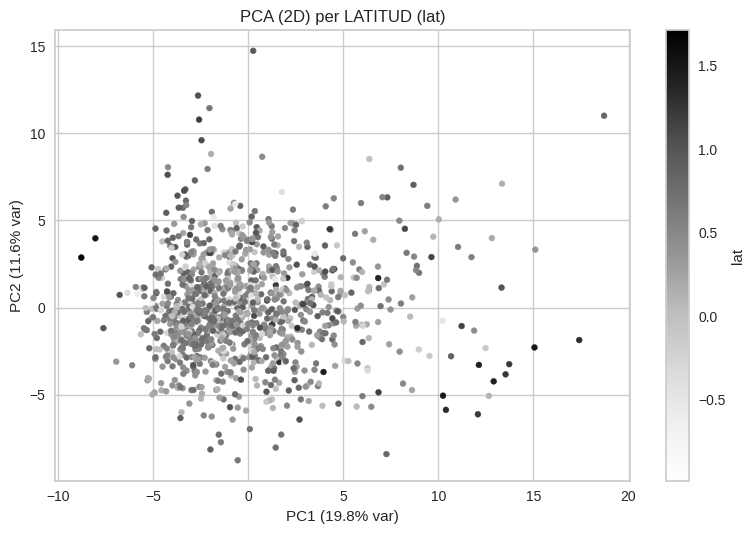

<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'PC1 (19.8% var)')

Text(0, 0.5, 'PC2 (11.6% var)')

Text(0.5, 1.0, 'PCA (2D) per LONGITUD (long)')

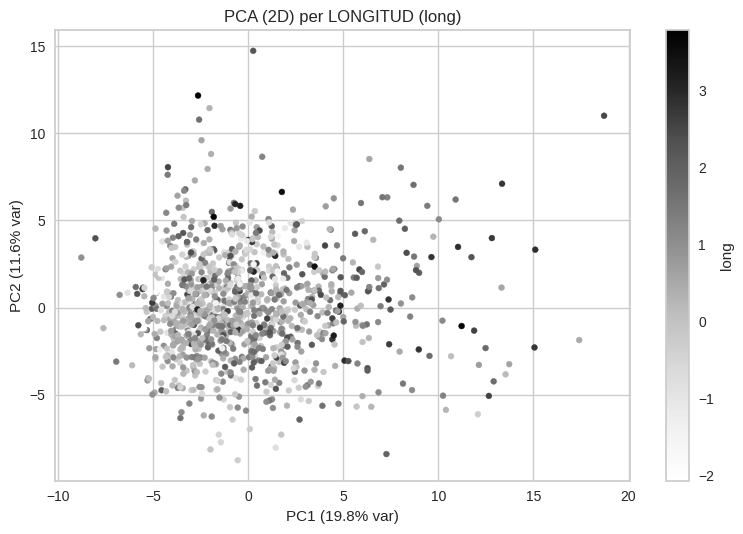

In [82]:


Xall_imp = np.vstack([np.asarray(Xtr_imp), np.asarray(Xte_imp)])

Yall = np.vstack([np.asarray(Ytr, dtype=float), np.asarray(Yte, dtype=float)])

#Estandaritzo les features per utilitzar-les en les regressions i en el PCA.
scaler = StandardScaler()
Xtr_std  = scaler.fit_transform(Xtr_imp)
Xte_std  = scaler.transform(Xte_imp)
Xall_std = scaler.transform(Xall_imp)

#Ajusto el PCA al train i li aplico al test
pca = PCA(n_components=2, random_state=42)
Z_train = pca.fit_transform(Xtr_std)
Z_test  = pca.transform(Xte_std)
Z_all   = pca.transform(Xall_std)

#Miro les mètriques del PCA
exp_var = pca.explained_variance_ratio_
lat = Yall[:, 0]
lon = Yall[:, 1]

r_lat_pc1 = np.corrcoef(Z_all[:,0], lat)[0,1]
r_lat_pc2 = np.corrcoef(Z_all[:,1], lat)[0,1]
r_lon_pc1 = np.corrcoef(Z_all[:,0], lon)[0,1]
r_lon_pc2 = np.corrcoef(Z_all[:,1], lon)[0,1]

print(f"Variança explicada -> PC1: {exp_var[0]*100:.1f}% | PC2: {exp_var[1]*100:.1f}%")
print(f"Correlacions amb LAT -> r(PC1, lat)={r_lat_pc1:.3f}, r(PC2, lat)={r_lat_pc2:.3f}")
print(f"Correlacions amb LON -> r(PC1, long)={r_lon_pc1:.3f}, r(PC2, long)={r_lon_pc2:.3f}")

#Represento les dues components per cada variable objectiu.
plt.figure()
plt.scatter(Z_all[:,0], Z_all[:,1], c=lat, s=18)
plt.xlabel(f"PC1 ({exp_var[0]*100:.1f}% var)"); plt.ylabel(f"PC2 ({exp_var[1]*100:.1f}% var)")
plt.title("PCA (2D) per LATITUD (lat)")
plt.colorbar(label="lat"); plt.tight_layout(); plt.show()

plt.figure()
plt.scatter(Z_all[:,0], Z_all[:,1], c=lon, s=18)
plt.xlabel(f"PC1 ({exp_var[0]*100:.1f}% var)"); plt.ylabel(f"PC2 ({exp_var[1]*100:.1f}% var)")
plt.title("PCA (2D) per LONGITUD (long)")
plt.colorbar(label="long"); plt.tight_layout(); plt.show()



Podem observar que amb 2 components expliquem un 31,4% de la variança de les dades cosa que no ens va gaire bé ja que es molt poca pero sembla ser que amb algunes components més potser explicaria suficient per aplicar la reducció de dimensionalitat.

Veiem que tant la primera com la segona component tenen més correlació amb la longitud que la latitud per tant la longitud contribueix més que la latitud a PC1 i PC2, per tant en el pla 2D es conserva millor la variància de la longitud.

#b)

Transforma las variables adecuadamente para poder ajustar un modelo de regresión tanto
el conjunto de entrenamiento como el de test.
Ajusta un modelo de regresión lineal para
predecir las dos variables objetivo y estima la calidad de la regresión.

¿Te parece suficientemente bueno el resultado? Analiza los pesos de los modelos.

Representa los residuos y
la predicción sobre el test contra los valores reales. Comenta qué aparece.

¿Qué variable
objetivo es más fácil de predecir?

LinearRegression()


 Mètriques de regresió lineal


,target,MAE,RMSE,R2,nRMSE
0,lat (train),0.200,0.254,0.540,0.678
1,long (train),0.542,0.678,0.517,0.695
2,lat (test),0.202,0.267,0.431,0.753
3,long (test),0.586,0.747,0.446,0.743


<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LAT')

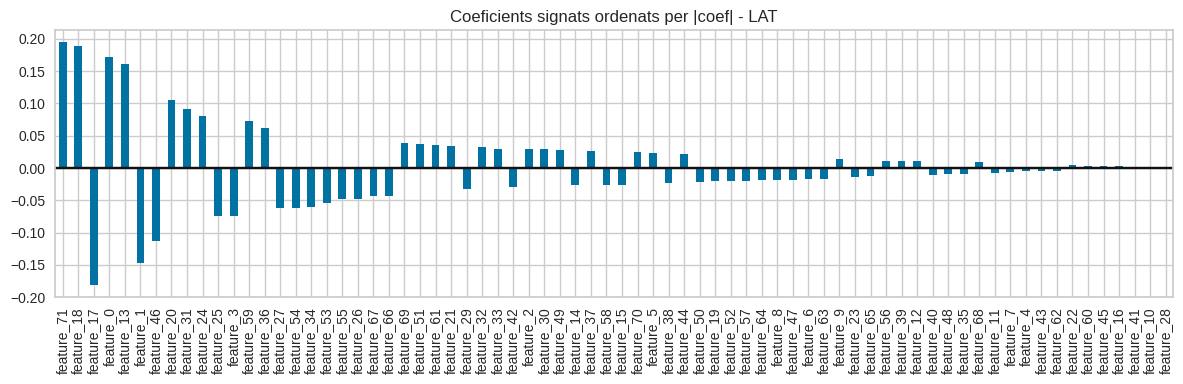

<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LONG')

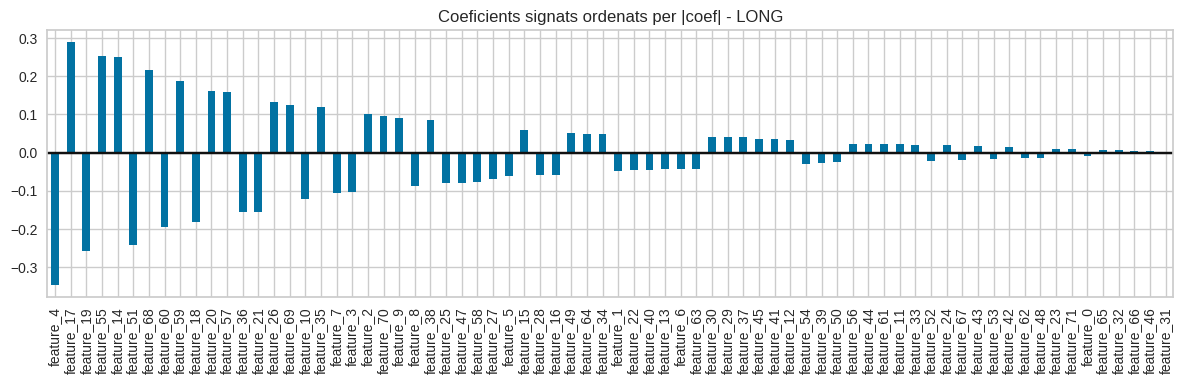

<Figure size 500x500 with 0 Axes>

Text(0.5, 0, 'coef LAT')

Text(0, 0.5, 'coef LONG')

Text(0.5, 1.0, 'LAT vs LONG (coeficients)')

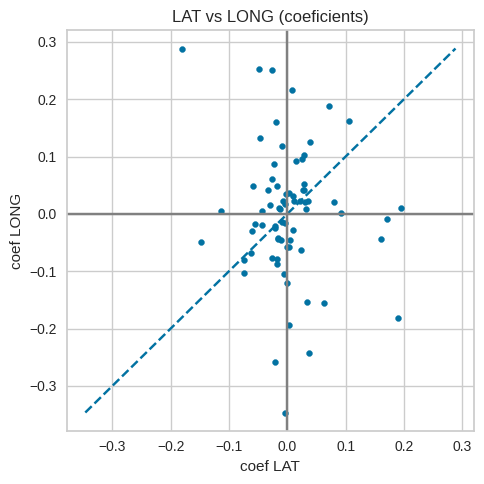

Cosine similarity: -0.125 | Mateix signe: 42/72


<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LAT')

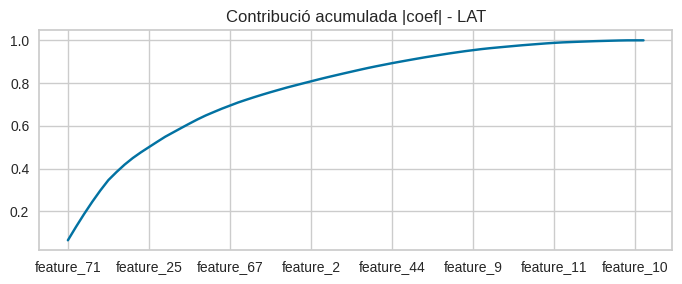

<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LONG')

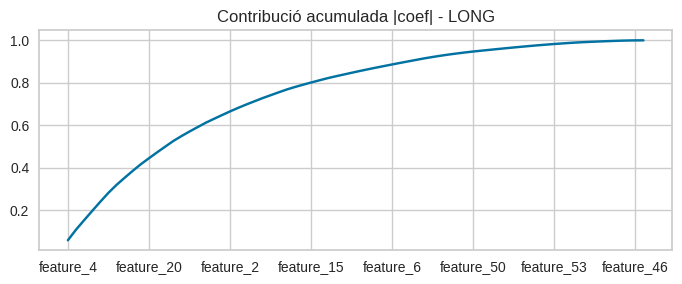

Top-15 overlap: 5 features → ['feature_17', 'feature_18', 'feature_20', 'feature_36', 'feature_59']


<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'LAT real')

Text(0, 0.5, 'LAT prevista')

Text(0.5, 1.0, 'Test: predicció vs real (LAT)')

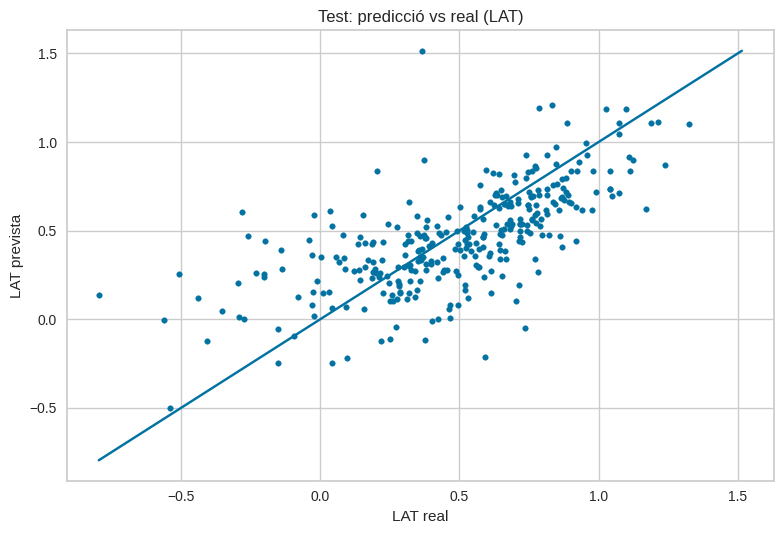

<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'LONG real')

Text(0, 0.5, 'LONG prevista')

Text(0.5, 1.0, 'Test: predicció vs real (LONG)')

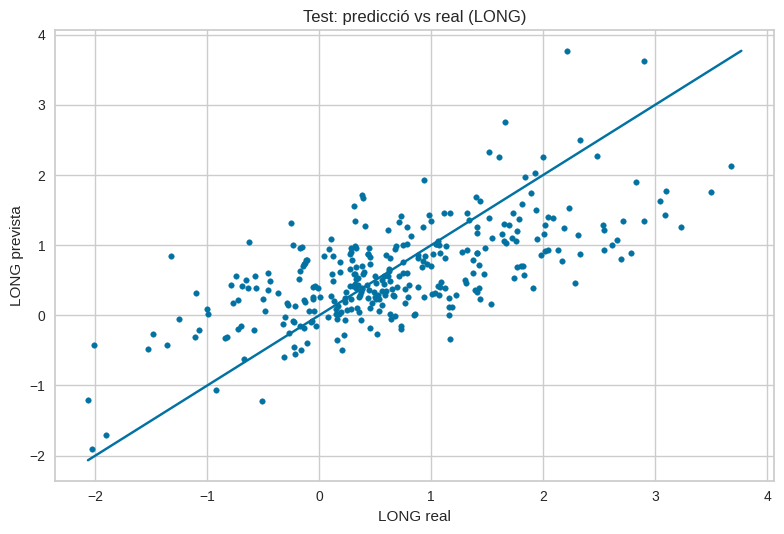

<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'LAT prevista')

Text(0, 0.5, 'Residu')

Text(0.5, 1.0, 'Test: residus vs predicció (LAT)')

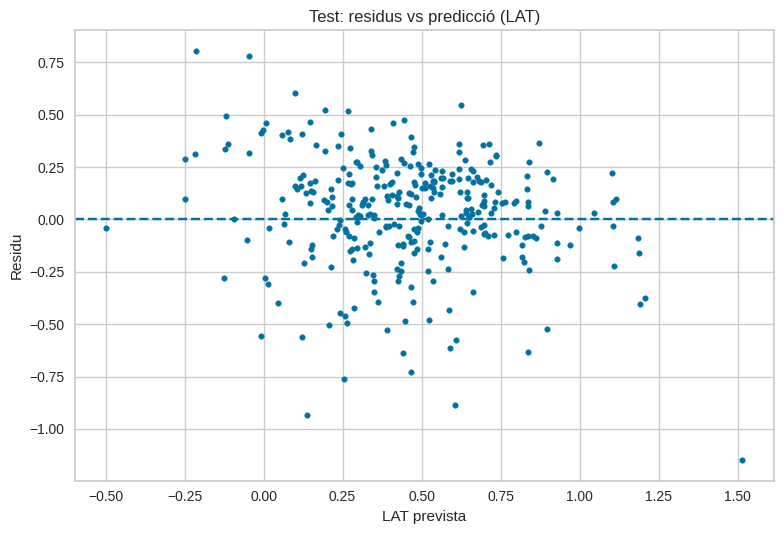

<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'LONG prevista')

Text(0, 0.5, 'Residu')

Text(0.5, 1.0, 'Test: residus vs predicció (LONG)')

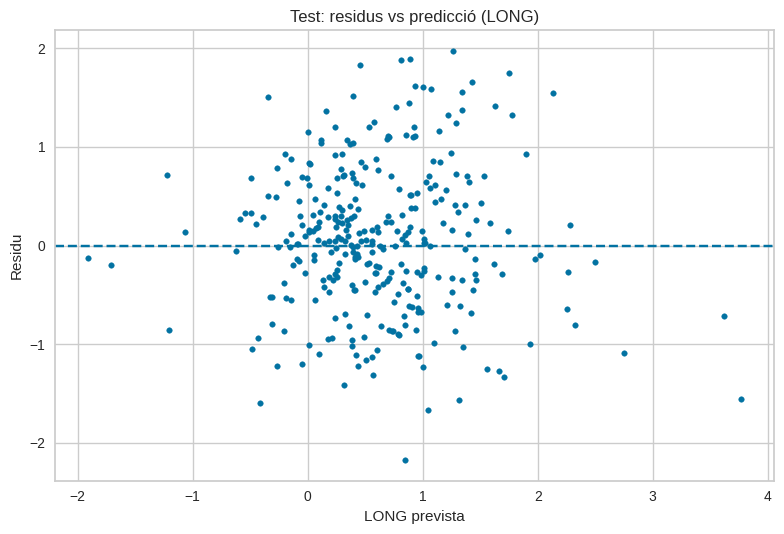

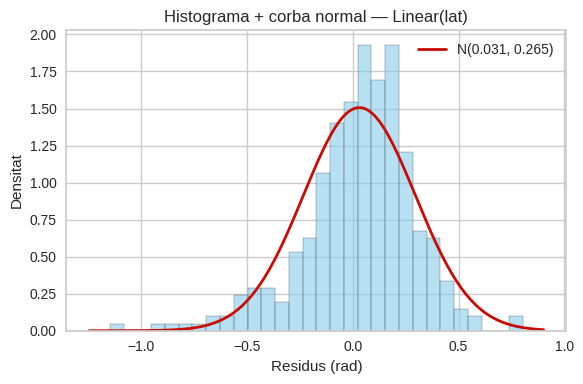

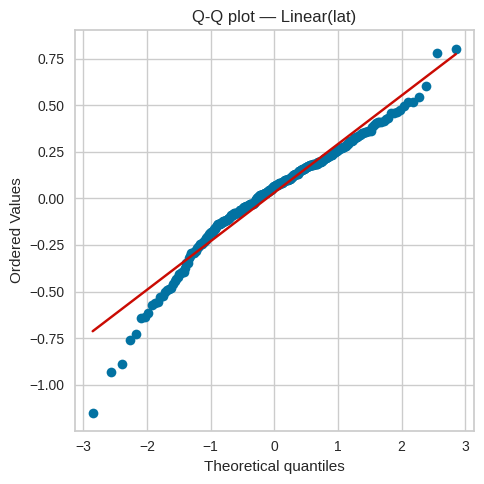

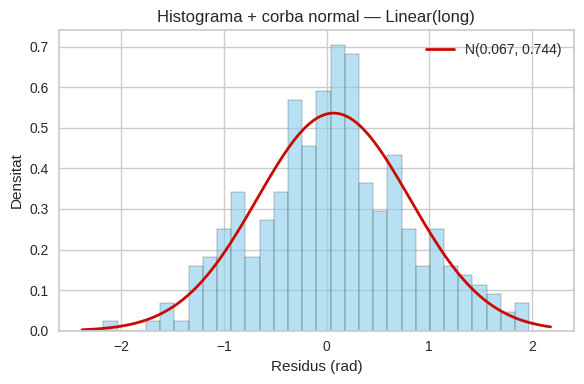

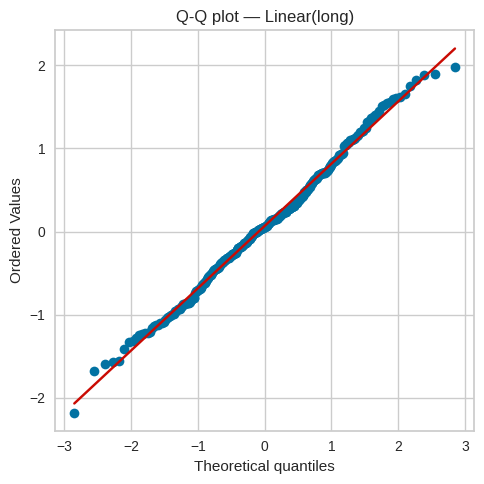

In [83]:

feature_names = Xt.columns

lin = LinearRegression()
lin.fit(Xtr_std, Ytr)
yhat_tr = lin.predict(Xtr_std)
yhat_te = lin.predict(Xte_std)

def plot_residual_diagnostics(residuals, model_name):
    """Mostra histograma amb corba ajustada i Q-Q plot per als residus"""
    mean, std = np.mean(residuals), np.std(residuals)

    # Histograma amb corba de densitat
    plt.figure(figsize=(6,4))
    count, bins, _ = plt.hist(residuals, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='k')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 200)
    p = stats.norm.pdf(x, mean, std)
    plt.plot(x, p, 'r', linewidth=2, label=f'N({mean:.3f}, {std:.3f})')
    plt.title(f"Histograma + corba normal — {model_name}")
    plt.xlabel("Residus (rad)")
    plt.ylabel("Densitat")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(5,5))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Q-Q plot — {model_name}")
    plt.tight_layout()
    plt.show()

# Mètriques per cada variable objectiu (latitud i longitud o distància en el apartat d)
def metrics(y_true, y_pred, nombre):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    nrmse = rmse / np.std(y_true, ddof=1) if np.std(y_true, ddof=1) > 0 else np.nan
    return {"target": nombre, "MAE": mae, "RMSE": rmse, "R2": r2, "nRMSE": nrmse}

Ytr = np.array(Ytr)
Yte = np.array(Yte)
yhat_tr = np.array(yhat_tr)
yhat_te = np.array(yhat_te)

m_tr_lat = metrics(Ytr[:,0], yhat_tr[:,0], "lat (train)")
m_tr_lon = metrics(Ytr[:,1], yhat_tr[:,1], "long (train)")
m_te_lat = metrics(Yte[:,0],  yhat_te[:,0],  "lat (test)")
m_te_lon = metrics(Yte[:,1],  yhat_te[:,1],  "long (test)")

x1 = m_te_lat["MAE"]
x2 = m_te_lon["MAE"]

res_df = pd.DataFrame([m_tr_lat, m_tr_lon, m_te_lat, m_te_lon])
print("\n Mètriques de regresió lineal")
display(res_df.round(4))

# Anàlisis de pesos (coeficients)
coefs = pd.DataFrame(lin.coef_.T, index=feature_names, columns=["coef_lat", "coef_long"])
coefs["|coef_lat|"] = coefs["coef_lat"].abs()
coefs["|coef_long|"] = coefs["coef_long"].abs()

# Gràfiques dels coeficients
lat_sorted = coefs["coef_lat"].sort_values(key=lambda s: s.abs(), ascending=False)
long_sorted = coefs["coef_long"].sort_values(key=lambda s: s.abs(), ascending=False)

plt.figure(figsize=(12,4)); lat_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LAT"); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,4)); long_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LONG"); plt.tight_layout(); plt.show()

x = coefs["coef_lat"].values; y = coefs["coef_long"].values
plt.figure(figsize=(5,5)); plt.scatter(x,y,s=18)
lims=[min(x.min(),y.min()), max(x.max(),y.max())]; plt.plot(lims,lims,'--')
plt.axhline(0,color="grey"); plt.axvline(0,color="grey")
plt.xlabel("coef LAT"); plt.ylabel("coef LONG"); plt.title("LAT vs LONG (coeficients)")
plt.tight_layout(); plt.show()


cos_sim = float(np.dot(x,y)/(norm(x)*norm(y)))
same_sign = int(np.sum(np.sign(x)==np.sign(y)))
print(f"Cosine similarity: {cos_sim:.3f} | Mateix signe: {same_sign}/{len(x)}")

cum_lat = coefs["|coef_lat|"].sort_values(ascending=False).cumsum(); cum_lat /= cum_lat.iloc[-1]
cum_lon = coefs["|coef_long|"].sort_values(ascending=False).cumsum(); cum_lon /= cum_lon.iloc[-1]
plt.figure(figsize=(7,3)); cum_lat.plot(); plt.title("Contribució acumulada |coef| - LAT"); plt.tight_layout(); plt.show()
plt.figure(figsize=(7,3)); cum_lon.plot(); plt.title("Contribució acumulada |coef| - LONG"); plt.tight_layout(); plt.show()

k=15
top_lat = coefs["|coef_lat|"].nlargest(k)
top_lon = coefs["|coef_long|"].nlargest(k)
overlap = set(top_lat.index) & set(top_lon.index)
print(f"Top-{k} overlap: {len(overlap)} features → {sorted(overlap)}")



#Gràfics: residus i predicció vs real (TEST)
res_lat = Yte[:,0] - yhat_te[:,0]
res_lon = Yte[:,1] - yhat_te[:,1]

#Predicció vs Real
plt.figure()
plt.scatter(Yte[:,0], yhat_te[:,0], s=16)
lims = [min(Yte[:,0].min(), yhat_te[:,0].min()), max(Yte[:,0].max(), yhat_te[:,0].max())]
plt.plot(lims, lims)
plt.xlabel("LAT real"); plt.ylabel("LAT prevista"); plt.title("Test: predicció vs real (LAT)")
plt.tight_layout(); plt.show()

plt.figure()
plt.scatter(Yte[:,1], yhat_te[:,1], s=16)
lims = [min(Yte[:,1].min(), yhat_te[:,1].min()), max(Yte[:,1].max(), yhat_te[:,1].max())]
plt.plot(lims, lims)
plt.xlabel("LONG real"); plt.ylabel("LONG prevista"); plt.title("Test: predicció vs real (LONG)")
plt.tight_layout(); plt.show()

# Residus vs Predicció
plt.figure()
plt.scatter(yhat_te[:,0], res_lat, s=16)
plt.axhline(0, ls="--")
plt.xlabel("LAT prevista"); plt.ylabel("Residu"); plt.title("Test: residus vs predicció (LAT)")
plt.tight_layout(); plt.show()

plt.figure()
plt.scatter(yhat_te[:,1], res_lon, s=16)
plt.axhline(0, ls="--")
plt.xlabel("LONG prevista"); plt.ylabel("Residu"); plt.title("Test: residus vs predicció (LONG)")
plt.tight_layout(); plt.show()

#Histograma i QQ Plot de residus (distribució d' errors)
plot_residual_diagnostics(res_lat, "Linear(lat)")
plot_residual_diagnostics(res_lon, "Linear(long)")

Veiem que el model de regresió lineal té un R^2 en el test d'un 0.446 per la longitud i un de 0.431 per la latitud cosa que diu que el model explica una mica millor la variabilitat de la longitud.

Podem dir que és dolenta la regresió ja que un R^2 de 0.4-0.5 o inferior no ens asegura tenir resultats gens fiables. Necessitariem minim un 0.6 o superior per estar satisfets ja que no és un problema on si es falla hi ha una consequencia dolenta. Si no en voldriem molt més.

Els coeficients per longitud éstan més repartits en les variables.
I podem observar que el model per predir la longitud i la latitud son molt diferents ja que tenen features que en un model sumen i en l'altre resten per tan veiem que no son variables similars de predir, a més a més ho veiem per que del top 15 dels coeficients de cada model només intersequen 5 features de 15.

Veien la predicció de totes dues variables observem que el model esta prou centrar en les dades però hi ha molta dispersió. I tots dos residus es veuen distribuits gaussianament (la longitud més gaussiana que la latitud) tot i que els de longitud amb un error menys gran, per això podem dir que és més fàcil de predir.

#c)

El número de variables es relativamente grande y eso puede afectar a la efectividad de los
modelos.

Ajusta regresiones Ridge y LASSO a los datos y analiza los resultados.

¿Qué
modelo es mejor para cada variable objetivo? Estudia cómo LASSO ha simplificado los
modelos, ¿para qué variable objetivo hacen falta más variables?

#1. Ridge


RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50], cv=5,
        scoring='r2')

RidgeCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50], cv=5,
        scoring='r2')

RidgeCV


,target,model,alpha,MAE_train,RMSE_train,R2_train,nRMSE_train,MAE_test,RMSE_test,R2_test,nRMSE_test
0,lat,Ridge,50.0,0.204,0.260,0.521,0.692,0.204,0.264,0.440,0.747
1,long,Ridge,50.0,0.553,0.684,0.507,0.702,0.579,0.738,0.459,0.734


<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LAT (Ridge)')

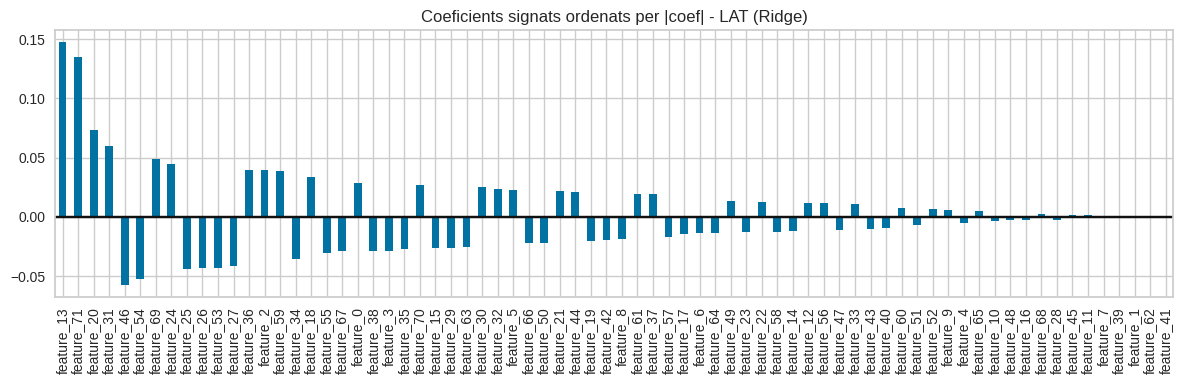

<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LONG (Ridge)')

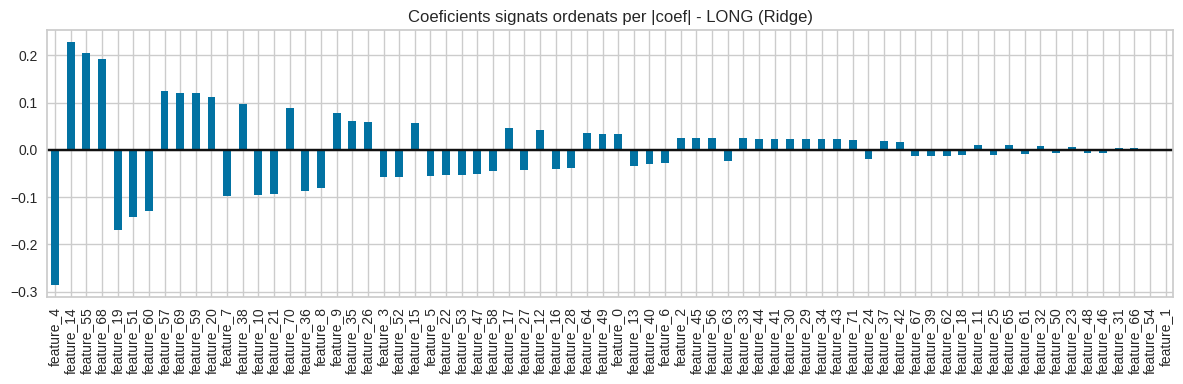

<Figure size 500x500 with 0 Axes>

Text(0.5, 0, 'coef LAT')

Text(0, 0.5, 'coef LONG')

Text(0.5, 1.0, 'LAT vs LONG (coeficients Ridge)')

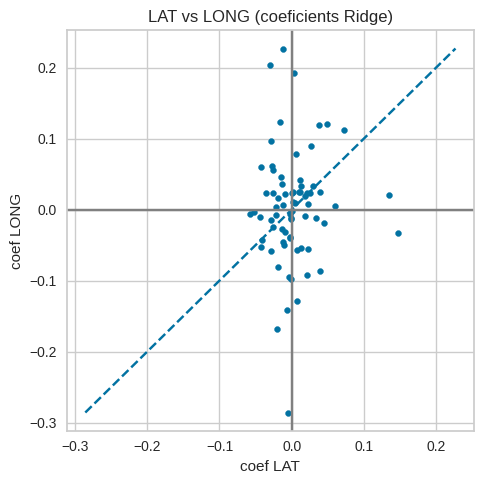

Cosine similarity (Ridge): 0.051 | Mateix signe: 45/72


<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LAT (Ridge)')

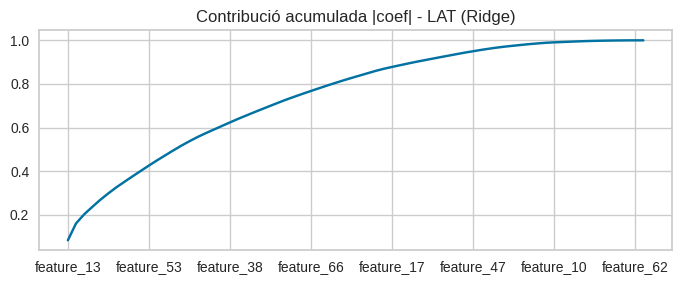

<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LONG (Ridge)')

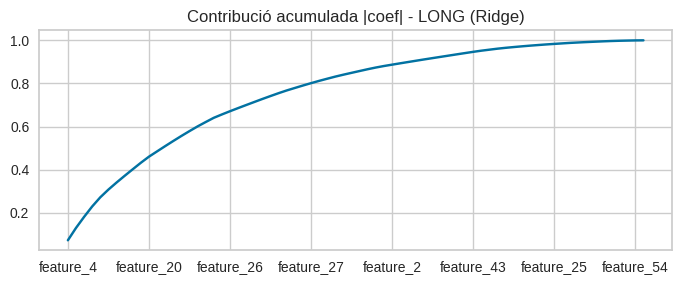

Top-15 overlap Ridge: 3 features → ['feature_20', 'feature_59', 'feature_69']


In [84]:
lambdas = [1e-4,1e-3,1e-2,0.1,0.5,1,5,10,50]

results = []
coefs_list = []

# Fem els dos Ridge per separat: un per lat i un per long
for j, name in enumerate(["lat", "long"]):
    ridge = RidgeCV(alphas=lambdas, cv=5, scoring="r2")
    ridge.fit(Xtr_std, Ytr[:, j])

    yhat_tr = ridge.predict(Xtr_std)
    yhat_te = ridge.predict(Xte_std)

    mtr_tr = metrics(Ytr[:, j], yhat_tr, name)
    mtr_te = metrics(Yte[:, j], yhat_te, name)

    results.append({
        "target": name, "model": "Ridge", "alpha": ridge.alpha_,
        "MAE_train": mtr_tr["MAE"], "RMSE_train": mtr_tr["RMSE"], "R2_train": mtr_tr["R2"], "nRMSE_train": mtr_tr["nRMSE"],
        "MAE_test": mtr_te["MAE"], "RMSE_test": mtr_te["RMSE"], "R2_test": mtr_te["R2"], "nRMSE_test": mtr_te["nRMSE"]
    })

    # Guardem coeficients
    coefs_list.append(pd.Series(ridge.coef_, index=feature_names, name=f"coef_{name}"))


res_df = pd.DataFrame(results)
print("RidgeCV")
display(res_df.round(4))

# Coeficients combinats
coefs_ridge_sep = pd.concat(coefs_list, axis=1)
coefs_ridge_sep["|coef_lat|"] = coefs_ridge_sep["coef_lat"].abs()
coefs_ridge_sep["|coef_long|"] = coefs_ridge_sep["coef_long"].abs()


#Gràfics de coeficients ordenats per magnitud
lat_sorted = coefs_ridge_sep["coef_lat"].sort_values(key=lambda s: s.abs(), ascending=False)
long_sorted = coefs_ridge_sep["coef_long"].sort_values(key=lambda s: s.abs(), ascending=False)

plt.figure(figsize=(12,4)); lat_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LAT (Ridge)"); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,4)); long_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LONG (Ridge)"); plt.tight_layout(); plt.show()

#Comparació LAT vs LONG
x = coefs_ridge_sep["coef_lat"].values; y = coefs_ridge_sep["coef_long"].values
plt.figure(figsize=(5,5)); plt.scatter(x, y, s=18)
lims=[min(x.min(),y.min()), max(x.max(),y.max())]; plt.plot(lims, lims, '--')
plt.axhline(0,color="grey"); plt.axvline(0,color="grey")
plt.xlabel("coef LAT"); plt.ylabel("coef LONG"); plt.title("LAT vs LONG (coeficients Ridge)")
plt.tight_layout(); plt.show()

from numpy.linalg import norm
cos_sim = float(np.dot(x,y)/(norm(x)*norm(y)))
same_sign = int(np.sum(np.sign(x)==np.sign(y)))
print(f"Cosine similarity (Ridge): {cos_sim:.3f} | Mateix signe: {same_sign}/{len(x)}")

#Contribució acumulada
cum_lat = coefs_ridge_sep["|coef_lat|"].sort_values(ascending=False).cumsum(); cum_lat /= cum_lat.iloc[-1]
cum_lon = coefs_ridge_sep["|coef_long|"].sort_values(ascending=False).cumsum(); cum_lon /= cum_lon.iloc[-1]
plt.figure(figsize=(7,3)); cum_lat.plot(); plt.title("Contribució acumulada |coef| - LAT (Ridge)"); plt.tight_layout(); plt.show()
plt.figure(figsize=(7,3)); cum_lon.plot(); plt.title("Contribució acumulada |coef| - LONG (Ridge)"); plt.tight_layout(); plt.show()

#Top-k features
k=15
top_lat = coefs_ridge_sep["|coef_lat|"].nlargest(k)
top_lon = coefs_ridge_sep["|coef_long|"].nlargest(k)
overlap = set(top_lat.index) & set(top_lon.index)
print(f"Top-{k} overlap Ridge: {len(overlap)} features → {sorted(overlap)}")


#2. Lasso

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50], cv=5,
        max_iter=10000, random_state=42)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50], cv=5,
        max_iter=10000, random_state=42)

=== LassoCV (entrenat per variable objectiu) ===


,target,modelo,alpha,MAE_train,RMSE_train,R2_train,nRMSE_train,MAE_test,RMSE_test,R2_test,nRMSE_test,coef_no_zero
0,lat,Lasso,0.01,0.219,0.276,0.457,0.737,0.207,0.261,0.455,0.737,26
1,long,Lasso,0.01,0.557,0.692,0.496,0.710,0.579,0.740,0.456,0.737,46


<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LAT (Lasso)')

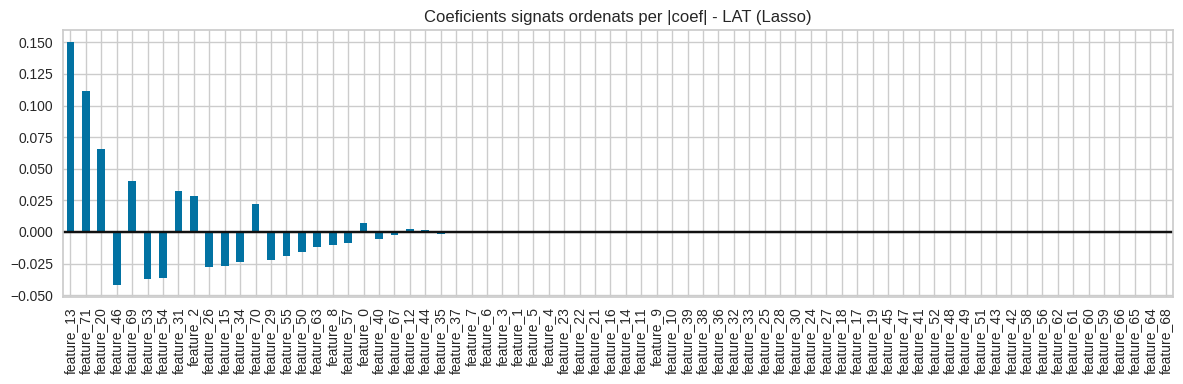

<Figure size 1200x400 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Coeficients signats ordenats per |coef| - LONG (Lasso)')

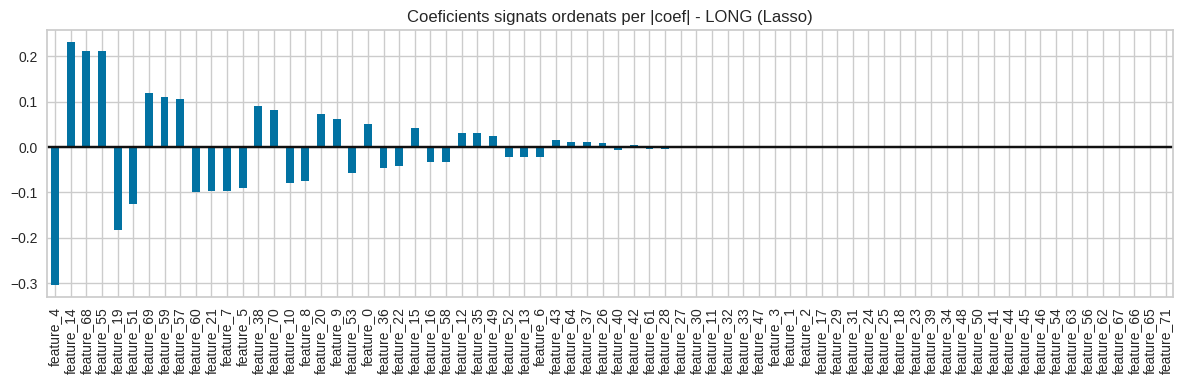

<Figure size 500x500 with 0 Axes>

Text(0.5, 0, 'coef LAT')

Text(0, 0.5, 'coef LONG')

Text(0.5, 1.0, 'LAT vs LONG (coeficients Lasso)')

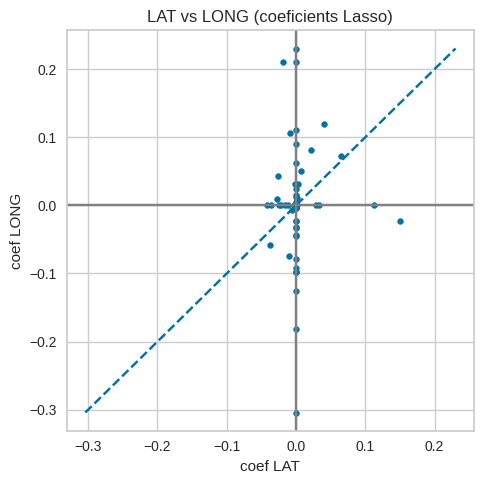

Cosine similarity (Lasso): 0.034 | Mateix signe: 24/72


<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LAT (Lasso)')

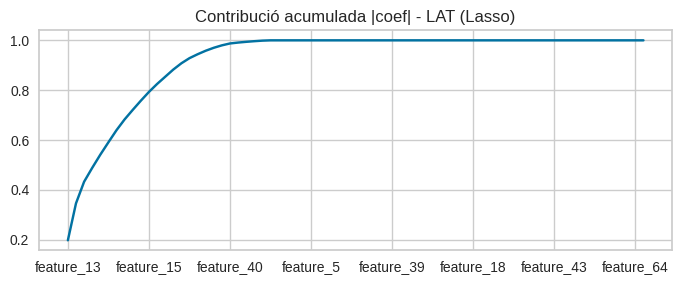

<Figure size 700x300 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Contribució acumulada |coef| - LONG (Lasso)')

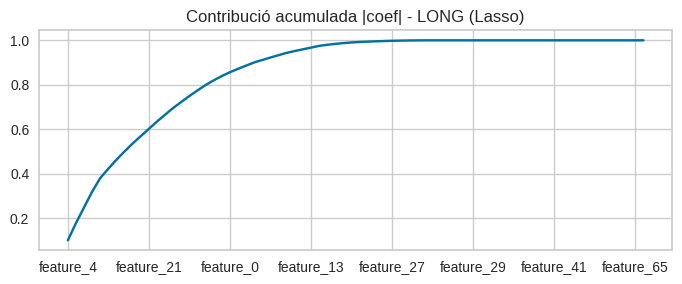

Top-15 overlap Lasso: 3 features → ['feature_55', 'feature_69', 'feature_70']


In [85]:

lambdas = [1e-4,1e-3,1e-2,0.1,0.5,1,5,10,50]
results = []
coefs_list = []

# Entrenem dos models Lasso: un per lat i un per long
for j, name in enumerate(["lat", "long"]):
    lasso = LassoCV(alphas=lambdas, cv=5, max_iter=10000, random_state=42)
    lasso.fit(Xtr_std, Ytr[:, j])

    yhat_tr = lasso.predict(Xtr_std)
    yhat_te = lasso.predict(Xte_std)

    mtr_tr = metrics(Ytr[:, j], yhat_tr, name)
    mtr_te = metrics(Yte[:, j], yhat_te, name)

    results.append({
        "target": name, "modelo": "Lasso", "alpha": lasso.alpha_,
        "MAE_train": mtr_tr["MAE"], "RMSE_train": mtr_tr["RMSE"], "R2_train": mtr_tr["R2"], "nRMSE_train": mtr_tr["nRMSE"],
        "MAE_test": mtr_te["MAE"], "RMSE_test": mtr_te["RMSE"], "R2_test": mtr_te["R2"], "nRMSE_test": mtr_te["nRMSE"],
        "coef_no_zero": np.count_nonzero(lasso.coef_)
    })

    # Guardem coeficients
    coefs_list.append(pd.Series(lasso.coef_, index=feature_names, name=f"coef_{name}"))

# Taula de resultats
res_lasso = pd.DataFrame(results)
print("=== LassoCV (entrenat per variable objectiu) ===")
display(res_lasso.round(4))

# Combinar coeficients en un sol DataFrame
coefs_lasso_sep = pd.concat(coefs_list, axis=1)
coefs_lasso_sep["|coef_lat|"] = coefs_lasso_sep["coef_lat"].abs()
coefs_lasso_sep["|coef_long|"] = coefs_lasso_sep["coef_long"].abs()

# Gràfics de coeficients ordenats per magnitud
lat_sorted = coefs_lasso_sep["coef_lat"].sort_values(key=lambda s: s.abs(), ascending=False)
long_sorted = coefs_lasso_sep["coef_long"].sort_values(key=lambda s: s.abs(), ascending=False)

plt.figure(figsize=(12,4)); lat_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LAT (Lasso)"); plt.tight_layout(); plt.show()

plt.figure(figsize=(12,4)); long_sorted.plot(kind="bar"); plt.axhline(0, color="k");
plt.title("Coeficients signats ordenats per |coef| - LONG (Lasso)"); plt.tight_layout(); plt.show()

# Comparació LAT vs LONG
x = coefs_lasso_sep["coef_lat"].values; y = coefs_lasso_sep["coef_long"].values
plt.figure(figsize=(5,5)); plt.scatter(x, y, s=18)
lims=[min(x.min(),y.min()), max(x.max(),y.max())]; plt.plot(lims, lims, '--')
plt.axhline(0,color="grey"); plt.axvline(0,color="grey")
plt.xlabel("coef LAT"); plt.ylabel("coef LONG"); plt.title("LAT vs LONG (coeficients Lasso)")
plt.tight_layout(); plt.show()

from numpy.linalg import norm
cos_sim = float(np.dot(x,y)/(norm(x)*norm(y))) if norm(x)*norm(y) > 0 else np.nan
same_sign = int(np.sum(np.sign(x)==np.sign(y)))
print(f"Cosine similarity (Lasso): {cos_sim:.3f} | Mateix signe: {same_sign}/{len(x)}")

# Contribució acumulada
cum_lat = coefs_lasso_sep["|coef_lat|"].sort_values(ascending=False).cumsum(); cum_lat /= cum_lat.iloc[-1] if cum_lat.iloc[-1]!=0 else np.nan
cum_lon = coefs_lasso_sep["|coef_long|"].sort_values(ascending=False).cumsum(); cum_lon /= cum_lon.iloc[-1] if cum_lon.iloc[-1]!=0 else np.nan
plt.figure(figsize=(7,3)); cum_lat.plot(); plt.title("Contribució acumulada |coef| - LAT (Lasso)"); plt.tight_layout(); plt.show()
plt.figure(figsize=(7,3)); cum_lon.plot(); plt.title("Contribució acumulada |coef| - LONG (Lasso)"); plt.tight_layout(); plt.show()

# Top-k features
k=15
top_lat = coefs_lasso_sep["|coef_lat|"].nlargest(k)
top_lon = coefs_lasso_sep["|coef_long|"].nlargest(k)
overlap = set(top_lat.index) & set(top_lon.index)
print(f"Top-{k} overlap Lasso: {len(overlap)} features → {sorted(overlap)}")


La latitud es millor amb Lasso mentre que la longitud es millor en Ridge tot i que per la poca millora que dona és millor utilitzar Lasso per què simplifica molt el model ja que treu moltes variables que no tenen quasi importància.

Ja que de 72 features només s'utilitzen 26 per la latitud i 46 per la longitud això ens diu que la variabilitat del model s'explica molt acumulada a certes features i la resta no aporten suficient. I ens diu que realment és més senzill predir la latitud que la longitud per que necessitem menys variables per aconseguir un R^2 similar. I la longitud té la seva variabilitat més dispersa per les variables.

#d)

Es complicado el tener que predecir dos variables de manera separada. Una alternativa sería
el poder representarlas como una.

Dado que tenemos localizaciones una posibilidad sería el
calcular la distancia a un punto arbitrario (por ejemplo, 0 latitud y 0 longitud) y usarla como
variable objetivo aunque no represente lo mismo
.

Podemos calcular la distancia entre
dos puntos en la superficie de una esfera usando la distancia de Haversine.

 Calcula esta
distancia para cada ejemplo (longitud y latitud están en radianes) y utiliza regresión lineal
y LASSO.

Compara la predicción con la media del error de las dos variables originales.
Comenta los resultados.

Distància (km) — mètriques


,model,MAE_train(km),RMSE_train(km),R2_train,nRMSE_train,MAE_test(km),RMSE_test(km),R2_test,nRMSE_test
0,"Linear(dist, km)",2112.177,2706.441,0.468,0.729,2256.771,2955.360,0.313,0.828
1,"LASSO(dist, km)",2190.609,2786.672,0.436,0.750,2218.452,2888.532,0.344,0.809



Mitjana dels errors originals (lat/long): 0.394


<Figure size 800x550 with 0 Axes>

Text(0.5, 0, 'Distància real (km)')

Text(0, 0.5, 'Distància predita (km)')

Text(0.5, 1.0, 'TEST: predicció vs real — distància (km)')

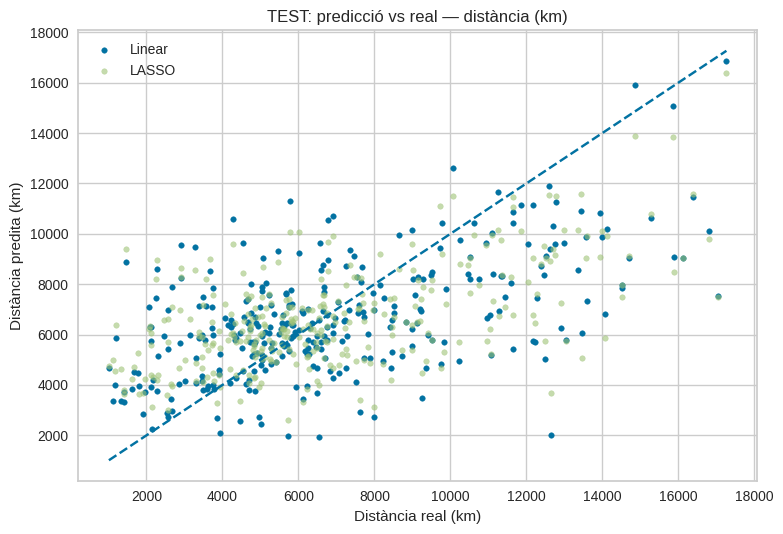

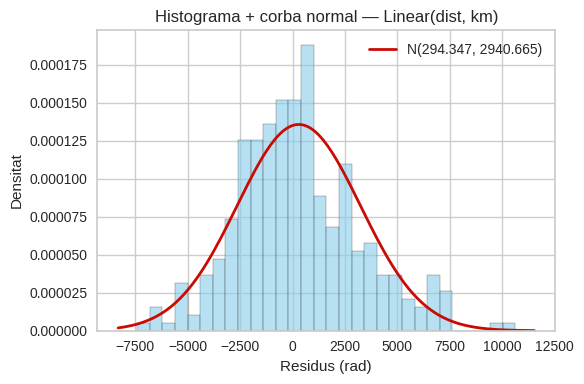

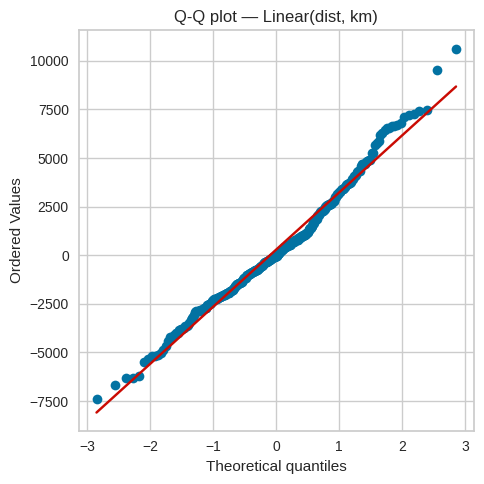

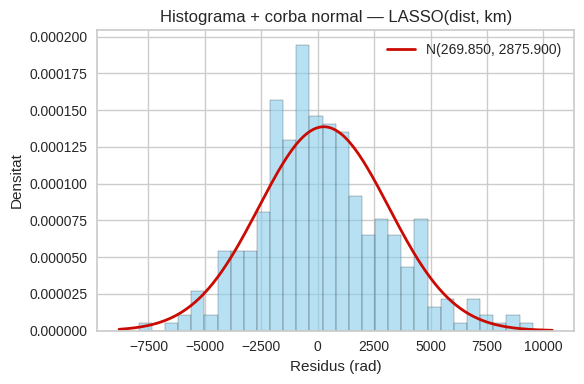

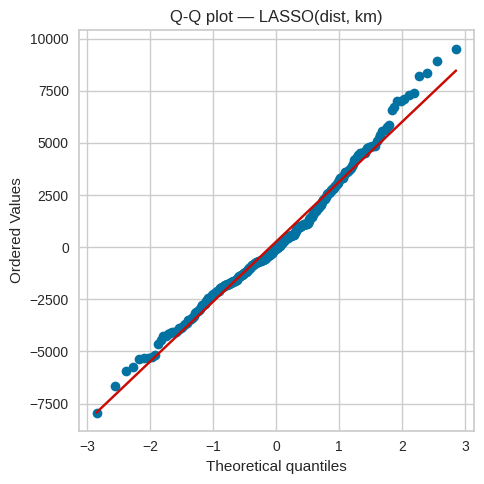

Coeficients ≠ 0 (t>1e-08):  Linear(dist, km) = 72 / 72
Coeficients ≠ 0 (t>1e-08):  LASSO(dist, km)  = 43 / 72

Top 15 |coef| — Linear(dist, km)


,feature,coef,abs
4,feature_4,-1086.767,1086.767
26,feature_26,1039.757,1039.757
20,feature_20,935.783,935.783
52,feature_52,-928.961,928.961
55,feature_55,905.588,905.588
59,feature_59,881.478,881.478
60,feature_60,-810.312,810.312
70,feature_70,800.393,800.393
1,feature_1,-683.165,683.165
0,feature_0,639.131,639.131



Top 15 |coef| — LASSO(dist, km)


,feature,coef,abs
4,feature_4,-906.748,906.748
55,feature_55,819.729,819.729
52,feature_52,-668.840,668.840
70,feature_70,644.029,644.029
5,feature_5,-492.466,492.466
59,feature_59,480.282,480.282
14,feature_14,473.797,473.797
20,feature_20,452.443,452.443
8,feature_8,-447.076,447.076
57,feature_57,423.491,423.491



Variables actives en LASSO (dist, km): 43


,feature,coef,abs
4,feature_4,-906.748,906.748
55,feature_55,819.729,819.729
52,feature_52,-668.840,668.840
70,feature_70,644.029,644.029
5,feature_5,-492.466,492.466
59,feature_59,480.282,480.282
14,feature_14,473.797,473.797
20,feature_20,452.443,452.443
8,feature_8,-447.076,447.076
57,feature_57,423.491,423.491


In [86]:

# Distància (km) al punt (0,0)
def haversine_dist(lat, lon):
    R = 6371
    return 2 * R * np.arcsin(np.sqrt(np.sin(lat/2)**2 + np.cos(lat) * np.sin(lon/2)**2))

d_tr = haversine_dist(Ytr[:,0], Ytr[:,1])
d_te = haversine_dist(Yte[:,0], Yte[:,1])


# Models: lineal i LASSO (una sola variable objectiu = distància en kilometres)
lin = LinearRegression().fit(Xtr_std, d_tr)
dhat_tr_lin = lin.predict(Xtr_std)
dhat_te_lin = lin.predict(Xte_std)

lasso = LassoCV(alphas=lambdas, cv=5, max_iter=10000, n_jobs=-1, random_state=42).fit(Xtr_std, d_tr)
dhat_tr_las = lasso.predict(Xtr_std)
dhat_te_las = lasso.predict(Xte_std)


# Mètriques
rows = []
for nombre, ytrp, ytep in [
    ("Linear(dist, km)", dhat_tr_lin, dhat_te_lin),
    ("LASSO(dist, km)",  dhat_tr_las, dhat_te_las),
]:
    mtr_tr = metrics(d_tr, ytrp, nombre)
    mtr_te = metrics(d_te, ytep, nombre)

    rows.append({
        "model": nombre,
        "MAE_train(km)": mtr_tr["MAE"], "RMSE_train(km)": mtr_tr["RMSE"],
        "R2_train": mtr_tr["R2"], "nRMSE_train": mtr_tr["nRMSE"],
        "MAE_test(km)":  mtr_te["MAE"], "RMSE_test(km)":  mtr_te["RMSE"],
        "R2_test":  mtr_te["R2"], "nRMSE_test":  mtr_te["nRMSE"]
    })

res_dist = pd.DataFrame(rows)
print("Distància (km) — mètriques")
display(res_dist.round(6))

# Mitjana MAE amb lat i long
mean_prev_mae = (x1 + x2) / 2
print(f"\nMitjana dels errors originals (lat/long): {mean_prev_mae:.3f}")


# Gràfics en TEST: predicció vs real i residus
plt.figure()
plt.scatter(d_te, dhat_te_lin, s=16, label="Linear")
plt.scatter(d_te, dhat_te_las, s=16, alpha=0.6, label="LASSO")
lims = [min(d_te.min(), dhat_te_lin.min(), dhat_te_las.min()),
        max(d_te.max(), dhat_te_lin.max(), dhat_te_las.max())]
plt.plot(lims, lims, ls="--")
plt.xlabel("Distància real (km)")
plt.ylabel("Distància predita (km)")
plt.title("TEST: predicció vs real — distància (km)")
plt.legend(); plt.tight_layout(); plt.show()

# Residus
plot_residual_diagnostics(res_lin, "Linear(dist, km)")
plot_residual_diagnostics(res_las, "LASSO(dist, km)")

# Coeficients i coeficients nulls
TOL = 1e-8

if 'feature_names' not in globals() or len(feature_names) != Xtr_std.shape[1]:
    feature_names = [f"feat_{i+1}" for i in range(Xtr_std.shape[1])]

coef_lin  = np.ravel(lin.coef_)
coef_las  = np.ravel(lasso.coef_)

nnz_lin = int(np.sum(np.abs(coef_lin) > TOL))
nnz_las = int(np.sum(np.abs(coef_las) > TOL))

print(f"Coeficients ≠ 0 (t>{TOL}):  Linear(dist, km) = {nnz_lin} / {len(coef_lin)}")
print(f"Coeficients ≠ 0 (t>{TOL}):  LASSO(dist, km)  = {nnz_las} / {len(coef_las)}")

coefs_lin_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef_lin,
    "abs": np.abs(coef_lin)
}).sort_values("abs", ascending=False)

coefs_las_df = pd.DataFrame({
    "feature": feature_names,
    "coef": coef_las,
    "abs": np.abs(coef_las)
}).sort_values("abs", ascending=False)

print("\nTop 15 |coef| — Linear(dist, km)")
display(coefs_lin_df.head(15).round(6))

print("\nTop 15 |coef| — LASSO(dist, km)")
display(coefs_las_df.head(15).round(6))

active_lasso = coefs_las_df[coefs_las_df["abs"] > TOL]
print(f"\nVariables actives en LASSO (dist, km): {len(active_lasso)}")
display(active_lasso.round(6).head(30))


Veiem que Lasso es millor que el Linear per que té menys sobreajustament tot i que també veiem que hem perdut informació de les features ja que prediu pitjor la distància ja que potser les features ens donaven informació direccional amb latitud i longitud que alhora de distància es perd ja que una posició amb latitud i longitud `lat1` i `long1` amb una altra que tingui com a posició `-lat1` i `-long1` quan pasem a variable objectiu distancia tindran la mateixa variable objectiu pero potser les features eren totalment diferent i per això es veu afectat el resultat ja que per coses que abans eren totalment diferents ara son iguals i les features potser estaven preparades per representar direccionalitat.